In [92]:
import math
import matplotlib
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np
import warnings

In [87]:
par_18 = gdal.Open("NASA_2002_2018_avg_par.tif")
par_18_band = par_18.GetRasterBand(1)
par_18_array = par_18_band.ReadAsArray()

kd490_18 = gdal.Open('NASA_avg_2002-2017_kd490.tif')
kd490_18_band = kd490_18.GetRasterBand(1)
kd490_18_array = kd490_18_band.ReadAsArray()

bathy_med = gdal.Open('EMODnet_bathymetry_rev.tif')
bathy_med_band = bathy_med.GetRasterBand(1)
bathy_med_array = bathy_med_band.ReadAsArray()

In [88]:
warnings.filterwarnings('ignore')
kdpar_array= 0.0665+(0.874 * kd490_18_array)-(0.00121 * (kd490_18_array**-1))
exp=np.multiply(-kdpar_array,bathy_med_array)
PAR_seabed_array = np.multiply(par_18_array,np.exp(exp))

In [89]:
PAR_seabed_array[PAR_seabed_array<=0]=np.NaN
PAR_seabed_array[PAR_seabed_array>par_18_array.max()]=np.NaN

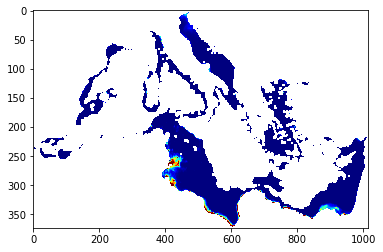

In [94]:
pyplot.imshow(PAR_seabed_array, vmin=0, vmax=5, cmap='jet', aspect='auto')
pyplot.show()

In [71]:
driver=gdal.GetDriverByName("GTiff")
driver.Register()
outds=driver.Create("PAR_seabed3.tif", xsize=PAR_seabed_array.shape[1], ysize=PAR_seabed_array.shape[0], bands=1,eType= gdal.GDT_Float32)
proj=par_18.GetProjection()
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outds.GetRasterBand(1).WriteArray(PAR_seabed_array)
outds.FlushCache()
outds = None